In [1]:
from InstagramAPI import InstagramAPI
import numpy as np
import time 

username = 'PASSWORD'
pwd = 'PASSWORD'

API = InstagramAPI(username,pwd)
API.login()
time.sleep(2)

#Sometimes it throws an 429 error but after that: "Login Success" so no worries


Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
Request return 404 error!
Login success!



In [4]:
#When you invoke getter function, all received data collects in LastJson,
#which is a dict type instance – the attribute of InstagramAPI class
API.getProfileData()
API.LastJson.keys()

dict_keys(['status', 'user'])

In [6]:
#So, let's get user properties and see what stuff we can access
print (API.LastJson['user'].keys())
my_id = API.LastJson['user']['pk']

dict_keys(['full_name', 'birthday', 'profile_pic_id', 'show_conversion_edit_entry', 'reel_auto_archive', 'pk', 'biography', 'is_private', 'allowed_commenter_type', 'country_code', 'hd_profile_pic_versions', 'profile_pic_url', 'username', 'gender', 'national_number', 'is_verified', 'has_anonymous_profile_picture', 'external_url', 'hd_profile_pic_url_info', 'phone_number', 'email', 'can_link_entities_in_bio'])


In [12]:
#Now, let's get to know how many posts I've published
API.getUsernameInfo(my_id)
total_posts = API.LastJson['user']['media_count']
print(total_posts)


103


Let's get all media IDs. This can be done step by step invoking
getUserFeed(usernameID, maxID) function. Collected data (dict with) infos on post number, list of post's info (items), more_available property and other things.
For one step you can get data only of 18 items because of instagrams limits, mabye. If there are no more post's, more_available equals False


In [23]:
media_ids = []
max_id = ''

for i in range(int(total_posts/18+1)):
    API.getUserFeed(usernameId=my_id, maxid= max_id)
    media_ids += API.LastJson['items']
    if API.LastJson['more_available']==False:
        print("no more available")
        break 
    max_id = API.LastJson['next_max_id']
    print(i, " next media id = ", max_id, " ",len(media_ids))
    time.sleep(3)

0  next media id =  1992094979871716519_10657045489   18
1  next media id =  1986588414230094135_10657045489   36
2  next media id =  1981304478386085223_10657045489   54
3  next media id =  1976733366260526930_10657045489   72
4  next media id =  1972387347355730331_10657045489   90
no more available


In [25]:
#We will go throw all media and collect media likers
likers= []
m_id = 0 
print("wait %.f minutes" % (total_posts*2/60.))
for i in range (len(media_ids)):
    m_id = media_ids[i]['id']
    API.getMediaLikers(m_id)
    likers += [API.LastJson]
    time.sleep(2)
print("done")

wait 3 minutes
done


In [27]:
#now we need to sort users and count all likes of unique user:
users=[]
for i in likers:
    users += map(lambda x: i['users'][x]['username'], range(len(i['users'])))
    
    users_set=set(users)
    print("All users: ", len(users), "uniqum users: ", len(users_set))

All users:  34 uniqum users:  34
All users:  103 uniqum users:  97
All users:  207 uniqum users:  189
All users:  325 uniqum users:  260
All users:  449 uniqum users:  339
All users:  545 uniqum users:  385
All users:  664 uniqum users:  442
All users:  761 uniqum users:  491
All users:  857 uniqum users:  539
All users:  974 uniqum users:  594
All users:  1068 uniqum users:  637
All users:  1183 uniqum users:  693
All users:  1289 uniqum users:  751
All users:  1432 uniqum users:  823
All users:  1559 uniqum users:  876
All users:  1688 uniqum users:  934
All users:  1819 uniqum users:  1006
All users:  1931 uniqum users:  1050
All users:  2072 uniqum users:  1128
All users:  2189 uniqum users:  1176
All users:  2321 uniqum users:  1221
All users:  2442 uniqum users:  1277
All users:  2586 uniqum users:  1329
All users:  2728 uniqum users:  1400
All users:  2849 uniqum users:  1450
All users:  2942 uniqum users:  1489
All users:  3027 uniqum users:  1530
All users:  3112 uniqum users:

In [29]:
#Make a dict with information of likes per user:
l_dict = {}
for user in users_set:
    #l_dict structure - {username:number_of_liked_posts}
    l_dict[user]=users.count(user)
print(l_dict)

{'chef.rodney': 2, 'buma_cafe_': 2, 'bergkranc_food': 2, 'restorantekka': 3, 'rinisfoodjourneys': 37, 'e_m_a_g_r_e_c_e': 1, 'diariofitness_lua': 4, 'emagreca_corretamente_e_viva_b': 1, 'plutarchos': 1, 'vocemaislindaagora': 1, 'caseytrebilcock': 1, 'vida2.zero': 1, 'a.scef': 1, 'thepancakebakery': 1, 'dusanstancik': 1, 'allanite_black': 2, 'formasfeminina': 1, 'dimecaps_': 12, 'cuisine_instinctive_healthy': 10, 'lukequine': 1, 'alexis.cor04': 1, 'citra_haries': 18, '_lupeaguilar': 1, 'charite.nico': 1, 'mehmetyusta': 3, 'receptury_fit_figury': 18, 'simo.kar': 6, 'lelluz83': 7, 'ooh.4dini6269_________': 1, 'pri_kaguya0825': 1, 'x.x.i.soul': 6, 'success.professional_57': 2, 'javier.keto.photo': 1, 'fitwithbenefits_': 1, 'custombakes_': 7, 'devour.sanfran': 2, '_h_09_03_': 5, 'reddevilvortex': 7, 'rosinhasuzi': 2, 'rechree': 1, 'emanuelegarieri': 1, 'sabendo_emagrece': 1, 'thefarmsteadtable': 1, 'mii___pq': 1, 'firstweeatthenwhatever': 3, 'una_donna_in_corriera': 1, 'cassianocoach': 1, 'a

In [35]:
#THE PLOTTING PART
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import operator

all_pairs = sorted(l_dict.items(), key=operator.itemgetter(1))
#Top 10 Users
n_users= 10 
#Sorted list of tuples with structure [(username, likes), ...]
pairs = all_pairs[-n_users:]

y = map(lambda y: pairs[y][1], range(len(pairs)))
x = map(lambda y: pairs[y][0], range(len(pairs)))

TypeError: 'function' object is not subscriptable

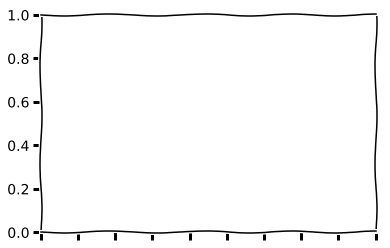

In [38]:
#create an empty figure
fig =plt.figure()
plt.xkcd()
plt.xticks(range(len(pairs)), x, rotation='vertical')
plt.ylim[80, 160]
plt.bar(range(len(pairs)), y)
#labelling
plt.xlabel('USERS')
plt.ylabel('number of liked posts')
#Printing out 
plt.show